# Preparing our data for training our models


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

MessageError: ignored

In [ ]:
file_path = '/content/drive/MyDrive/Module 3/dataset_final_threshold.xlsx'
df = pd.read_excel(file_path)

In [ ]:
df.shape

(298, 398)

# Preprocessing data for Decision trees:

1. Dealing with NaN
2. Dealing with Strings

## 1. Dealing with NaN

In [ ]:
nan_columns = df.columns[df.isnull().any()]
print("Columns with NaN values:")
print(nan_columns)
nan_sum = df[nan_columns].isnull().sum()
print("Sum of NaN values for each column:")
print(nan_sum)

Columns with NaN values:
Index(['SL', 'EtDef', 'pCT_AMB', 'WB', 'pCT_STAT', 'CMIb', 'PersAWB', 'CMIn',
       'KostWBLFA', 'pMRI_AMB', 'pMRI_STAT', 'SA', 'ErlKVGStatVA_new',
       'ErlZvOKPStatVA_new'],
      dtype='object')
Sum of NaN values for each column:
SL                    23
EtDef                 77
pCT_AMB               19
WB                     6
pCT_STAT              18
CMIb                  81
PersAWB               77
CMIn                  81
KostWBLFA              1
pMRI_AMB              46
pMRI_STAT             46
SA                    11
ErlKVGStatVA_new       4
ErlZvOKPStatVA_new    10
dtype: int64


**Variables that contain NaN values:**

KostAWLFA              1 - Kosten der universitären Lehre zur Ausbildung


---


KostForLFA             1 - Kosten der universitären Forschung

---


EtDef                 77 - Alle finanziellen Unterstützungen durch die öffentliche Hand oder privatrechtliche Organisationen wie Reserven, Gemeinde, Kantone, Bund, Private Rechtsträger in Form von allfälligen separat ausgewiesenen Defizitdeckungen.

---


pCT_AMB               19 - Anzahl CT Untersuchungen pro CT-Scanner, ambulant

---


pCT_STAT              18 - Anzahl CT Untersuchungen pro CT-Scanner, stationär


---


CMIb                  81 - Roher mittlerer Schweregrad der behandelten stationären Fälle, ohne Kompensation der Outlier, die eine Aufenthaltsdauer ausserhalb der erwarteten Grenzen haben; ausgewiesen pro Aktivitätstyp


---


PersAWB               77 - Ärzte in Weiterbildung



---


CMIn                  81 - Casemix Index (CMI) netto



---

KostWBLFA              1 - Kosten Weiterbildung



---


pMRI_AMB              46 - Anzahl MRI Untersuchungen pro MRI-Scanner, ambulant



---


pMRI_STAT             46 - Anzahl MRI Untersuchungen pro MRI-Scanner, stationär



---



ErlKVGStatVA_new       4 - Anteil der Versicherer am Erlös aus Leistungen zulasten der OKP an Patienten mit stationärem Aufenthalt



---



ErlZvOKPStatVA_new    10 - Anteil der Versicherer am Erlös aus Leistungen an zusatzversicherten Patienten mit stationärem Aufenthalt

**Procedure:** Loop through the dataframe and replace NaN by the value for the same hospital but from another year

In [ ]:
# Replace NaN values in columns (except 'name_hosp' and 'JAHR') with None to facilitate comparisons
df.replace({np.nan: None}, inplace=True)

# Iterate through each row
for index, row in df.iterrows():
    current_name = row['name_hosp']
    current_year = row['JAHR']

    # Check if the current row has NaN values in specified columns
    if any(row[col] is None for col in df.columns if col not in ['name_hosp', 'JAHR']):
        # Find rows with the same 'name_hosp' but not the same row
        same_name_rows = df[(df['name_hosp'] == current_name) & (df.index != index)]

        # Iterate through the rows with the same 'name_hosp'
        for _, similar_row in same_name_rows.iterrows():
            # Check if the similar row has non-NaN values in the specified columns
            if all(similar_row[col] is not None for col in df.columns if col not in ['name_hosp', 'JAHR']):
                # Replace NaN values in the current row with values from the similar row
                for col in df.columns:
                    if col not in ['name_hosp', 'JAHR'] and row[col] is None:
                        df.at[index, col] = similar_row[col]

# Replace None back to NaN
df.replace({None: np.nan}, inplace=True)

In [ ]:
nan_columns = df.columns[df.isnull().any()]
print("Columns with NaN values:")
print(nan_columns)
nan_sum = df[nan_columns].isnull().sum()
print("Sum of NaN values for each column:")
print(nan_sum)

Columns with NaN values:
Index(['SL', 'EtDef', 'pCT_AMB', 'WB', 'pCT_STAT', 'CMIb', 'PersAWB', 'CMIn',
       'pMRI_AMB', 'pMRI_STAT', 'SA', 'ErlKVGStatVA_new',
       'ErlZvOKPStatVA_new'],
      dtype='object')
Sum of NaN values for each column:
SL                    23
EtDef                 19
pCT_AMB               19
WB                     6
pCT_STAT              18
CMIb                  21
PersAWB               19
CMIn                  21
pMRI_AMB              45
pMRI_STAT             45
SA                    11
ErlKVGStatVA_new       4
ErlZvOKPStatVA_new     8
dtype: int64


**Procedure:** We now have much less missing values, however there are still some left. Let's check which hospitals have NaN values left.

In [ ]:
for index, row in df.iterrows():
    nan_present = row.drop(['name_hosp', 'JAHR']).isnull().any()  # Check if any NaN value exists

    if nan_present:
        name_hosp_value = row['name_hosp']
        print(f"Row {index}: 'name_hosp' value is {name_hosp_value} - Contains NaN")

Row 1: 'name_hosp' value is Bethesda Spital AG - Contains NaN
Row 3: 'name_hosp' value is Center da Sanda Engiadina Bassa Ospidal d'Engiadina Bassa - Contains NaN
Row 4: 'name_hosp' value is Centro Sanitario Valposchiavo Ospedale San Sisto - Contains NaN
Row 6: 'name_hosp' value is Clinique Générale-Beaulieu - Contains NaN
Row 7: 'name_hosp' value is Clinique de La Source - Contains NaN
Row 23: 'name_hosp' value is Hôpital Jules Daler - Contains NaN
Row 25: 'name_hosp' value is Hôpital de la Tour - Contains NaN
Row 44: 'name_hosp' value is Paracelsus-Spital Richterswil AG - Contains NaN
Row 45: 'name_hosp' value is Privatklinik Bethanien - GSMN Schweiz AG - Contains NaN
Row 49: 'name_hosp' value is SMN - Klinik Villa im Park - Contains NaN
Row 52: 'name_hosp' value is Spital Affoltern - Contains NaN
Row 53: 'name_hosp' value is Spital Bülach AG - Contains NaN
Row 54: 'name_hosp' value is Spital Davos AG Akutabteilung - Contains NaN
Row 55: 'name_hosp' value is Spital Einsiedeln - Conta

**Procedure:** We now know that all the missing NaN values are from non-university hospitals. We will hence replace the NaN values by the mean of all the non-university hospitals.

In [ ]:
means = df.drop('Typ', axis=1)[df['Typ'] != 'K111'].apply(pd.to_numeric, errors='coerce').mean()
print(means)

name_hosp                   NaN
I.1.16.M               0.088776
A.5.1.F                0.257695
A.7.14.M               0.009127
L.6.4.F                0.004196
                         ...   
F.3.1.V                0.002374
pBettenBelStatA_new    0.763560
ErlKVGStatVA_new       0.466784
ErlZvOKPStatVA_new     0.573923
threshold              0.510714
Length: 397, dtype: float64


In [2]:
for col in means.index:
    df[col].fillna(means[col], inplace=True)

NameError: ignored

In [ ]:
nan_columns = df.columns[df.isnull().any()]
print("Columns with NaN values:")
print(nan_columns)
nan_sum = df[nan_columns].isnull().sum()
print("Sum of NaN values for each column:")
print(nan_sum)

Columns with NaN values:
Index(['SL', 'WB', 'SA'], dtype='object')
Sum of NaN values for each column:
SL    23
WB     6
SA    11
dtype: int64


**Result:** We only have NaN in 3 string columns now, which we will deal with later.

## 2. String Value encoding

**Procedure:** Let's first check how many columns with string values we have

In [ ]:
string_columns = df.select_dtypes(include='object').columns
print("Columns with string values:", string_columns)
for column in string_columns:
    print(f"Unique values and counts for column '{column}':")
    print(df[column].value_counts())
    print()

Columns with string values: Index(['name_hosp', 'Akt', 'SL', 'Typ', 'LA', 'WB', 'KT', 'RForm', 'SA'], dtype='object')
Unique values and counts for column 'name_hosp':
EOC Ente ospedaliero cantonale                                                 7
Spital Thurgau AG Kantonsspitäler Frauenfeld & Münsterlingen                   5
Spitalregion Rheintal Werdenberg Sarganserland                                 5
Luzerner Kantonsspital                                                         5
Spitäler Frutigen Meiringen Interlaken AG                                      5
                                                                              ..
Spitalverbund Appenzell Ausserrhoden, Akutsomatisches Spital Heiden/Herisau    1
Hirslanden Klinik St. Anna AG Hirslanden Klinik Meggen                         1
SMN - Klinik Villa im Park                                                     1
Spital Affoltern                                                               1
Spitalverbund Appenzell

**Procedure:** We saw that the 'name_hosp' column takes many different values and most probably doesn't contain information with a lot of value for our prediction. We hence decide to drop this column and use 'one hot encoding' for the other string variables. One hot encoding creates binary columns for each category.

(This is better than using label encoder since label encoder assumes a clear, meaningful order or ranking in the variables to be encoded which is not the case for our string variables.)

In [ ]:
df.shape

(298, 398)

In [ ]:
df = df.drop('name_hosp', axis=1)
columns_to_onehot = ['Akt', 'SL', 'Typ', 'LA', 'WB', 'KT', 'RForm', 'SA']
df_encoded = pd.get_dummies(df, columns=columns_to_onehot)

In [ ]:
df_encoded.shape #to check if one hot encoding worked

(298, 467)

In [3]:
nan_columns = df_encoded.columns[df_encoded.isnull().any()]
print("Columns with NaN values:")
print(nan_columns)
nan_sum = df_encoded[nan_columns].isnull().sum()
print("Sum of NaN values for each column:")
print(nan_sum)

NameError: ignored

# Creating Train and Test set

First we will prepare our data in order to have a train and test set. The size of the the test set will be 25% of our datapoints.

In [ ]:
y = df_encoded[['threshold']].copy()
X = df_encoded.drop('threshold', axis=1).copy()

In [ ]:
print(X.columns)

Index(['I.1.16.M', 'A.5.1.F', 'A.7.14.M', 'L.6.4.F', 'KostAWLFA', 'L.5.5.F',
       'A.7.1.F', 'D.2.6.P', 'J.1.4.M', 'L.6.8.F',
       ...
       'SA_MRI, CT, Lito, Dia', 'SA_MRI, CT, PET, Angio, Dia',
       'SA_MRI, CT, PET, CC, Angio', 'SA_MRI, CT, PET, CC, Angio, Dia',
       'SA_MRI, CT, PET, CC, LB, Angio', 'SA_MRI, CT, PET, CC, LB, Angio, Dia',
       'SA_MRI, CT, PET, CC, LB, Dia', 'SA_MRI, CT, PET, CC, LB, Lito, Angio',
       'SA_MRI, CT, PET, CC, LB, Lito, Angio, Dia',
       'SA_MRI, CT, PET, CC, Lito, Angio, Dia'],
      dtype='object', length=466)


In [ ]:
print(y.columns)

Index(['threshold'], dtype='object')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)

In [ ]:
type(X_train), X_train.shape

(pandas.core.frame.DataFrame, (223, 466))

#Decision Trees

Well suited for our task because:
- they work well with little data
- we have numerical and non-numerical inputs
- they could capture potentially interesting non-linear dependencies that we might miss with out regression model
- can be visualized

In [ ]:
from sklearn import tree

## 1. Using Gini as Criterion

In [ ]:
'''for depth in (2, 4, 6, 7, 8, 10, 12):
    clf = tree.DecisionTreeClassifier(max_depth=depth, criterion='gini')  # 'entropy'
    clf.fit(X_train, y_train)
    print("training score : %.3f (depth=%d)" % (clf.score(X, y), depth))'''


'for depth in (2, 4, 6, 7, 8, 10, 12):\n    clf = tree.DecisionTreeClassifier(max_depth=depth, criterion=\'gini\')  # \'entropy\'\n    clf.fit(X_train, y_train)\n    print("training score : %.3f (depth=%d)" % (clf.score(X, y), depth))'

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth = 10) #initiating a decision tree classifier

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
predictions = clf.predict(X_test)
print(predictions)

[0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1
 1]


$\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}$

  

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.64

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[30, 17],
       [10, 18]])

$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}}$

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

0.5142857142857142

$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}$

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions)

0.6428571428571429

In [ ]:
feature_names = X.columns

In [ ]:
clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06832999, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names).sort_values(0, ascending=False)

In [ ]:
features = list(feature_importance[feature_importance[0]>0].index)

Text(0.5, 1.0, 'Top 17 Features with Highest Decision Tree (Gini) Feature Importance')

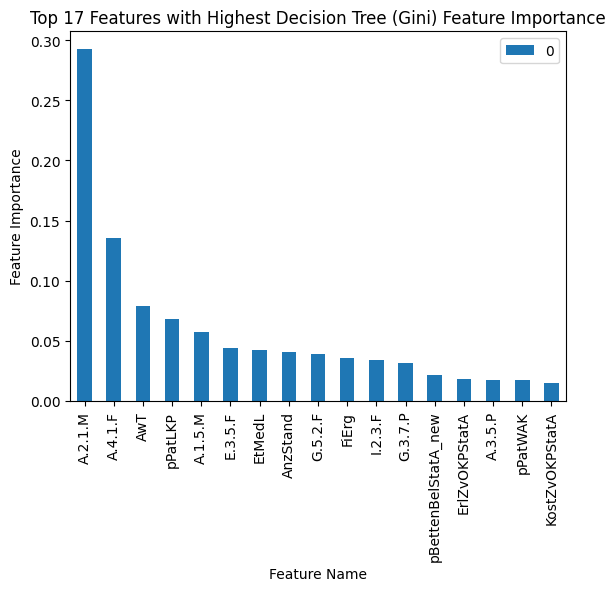

In [ ]:
feature_importance.head(17).plot(kind='bar')
plt.ylabel('Feature Importance')
plt.xlabel('Feature')
plt.title('Top 17 Features with Highest Decision Tree (Gini) Feature Importance')

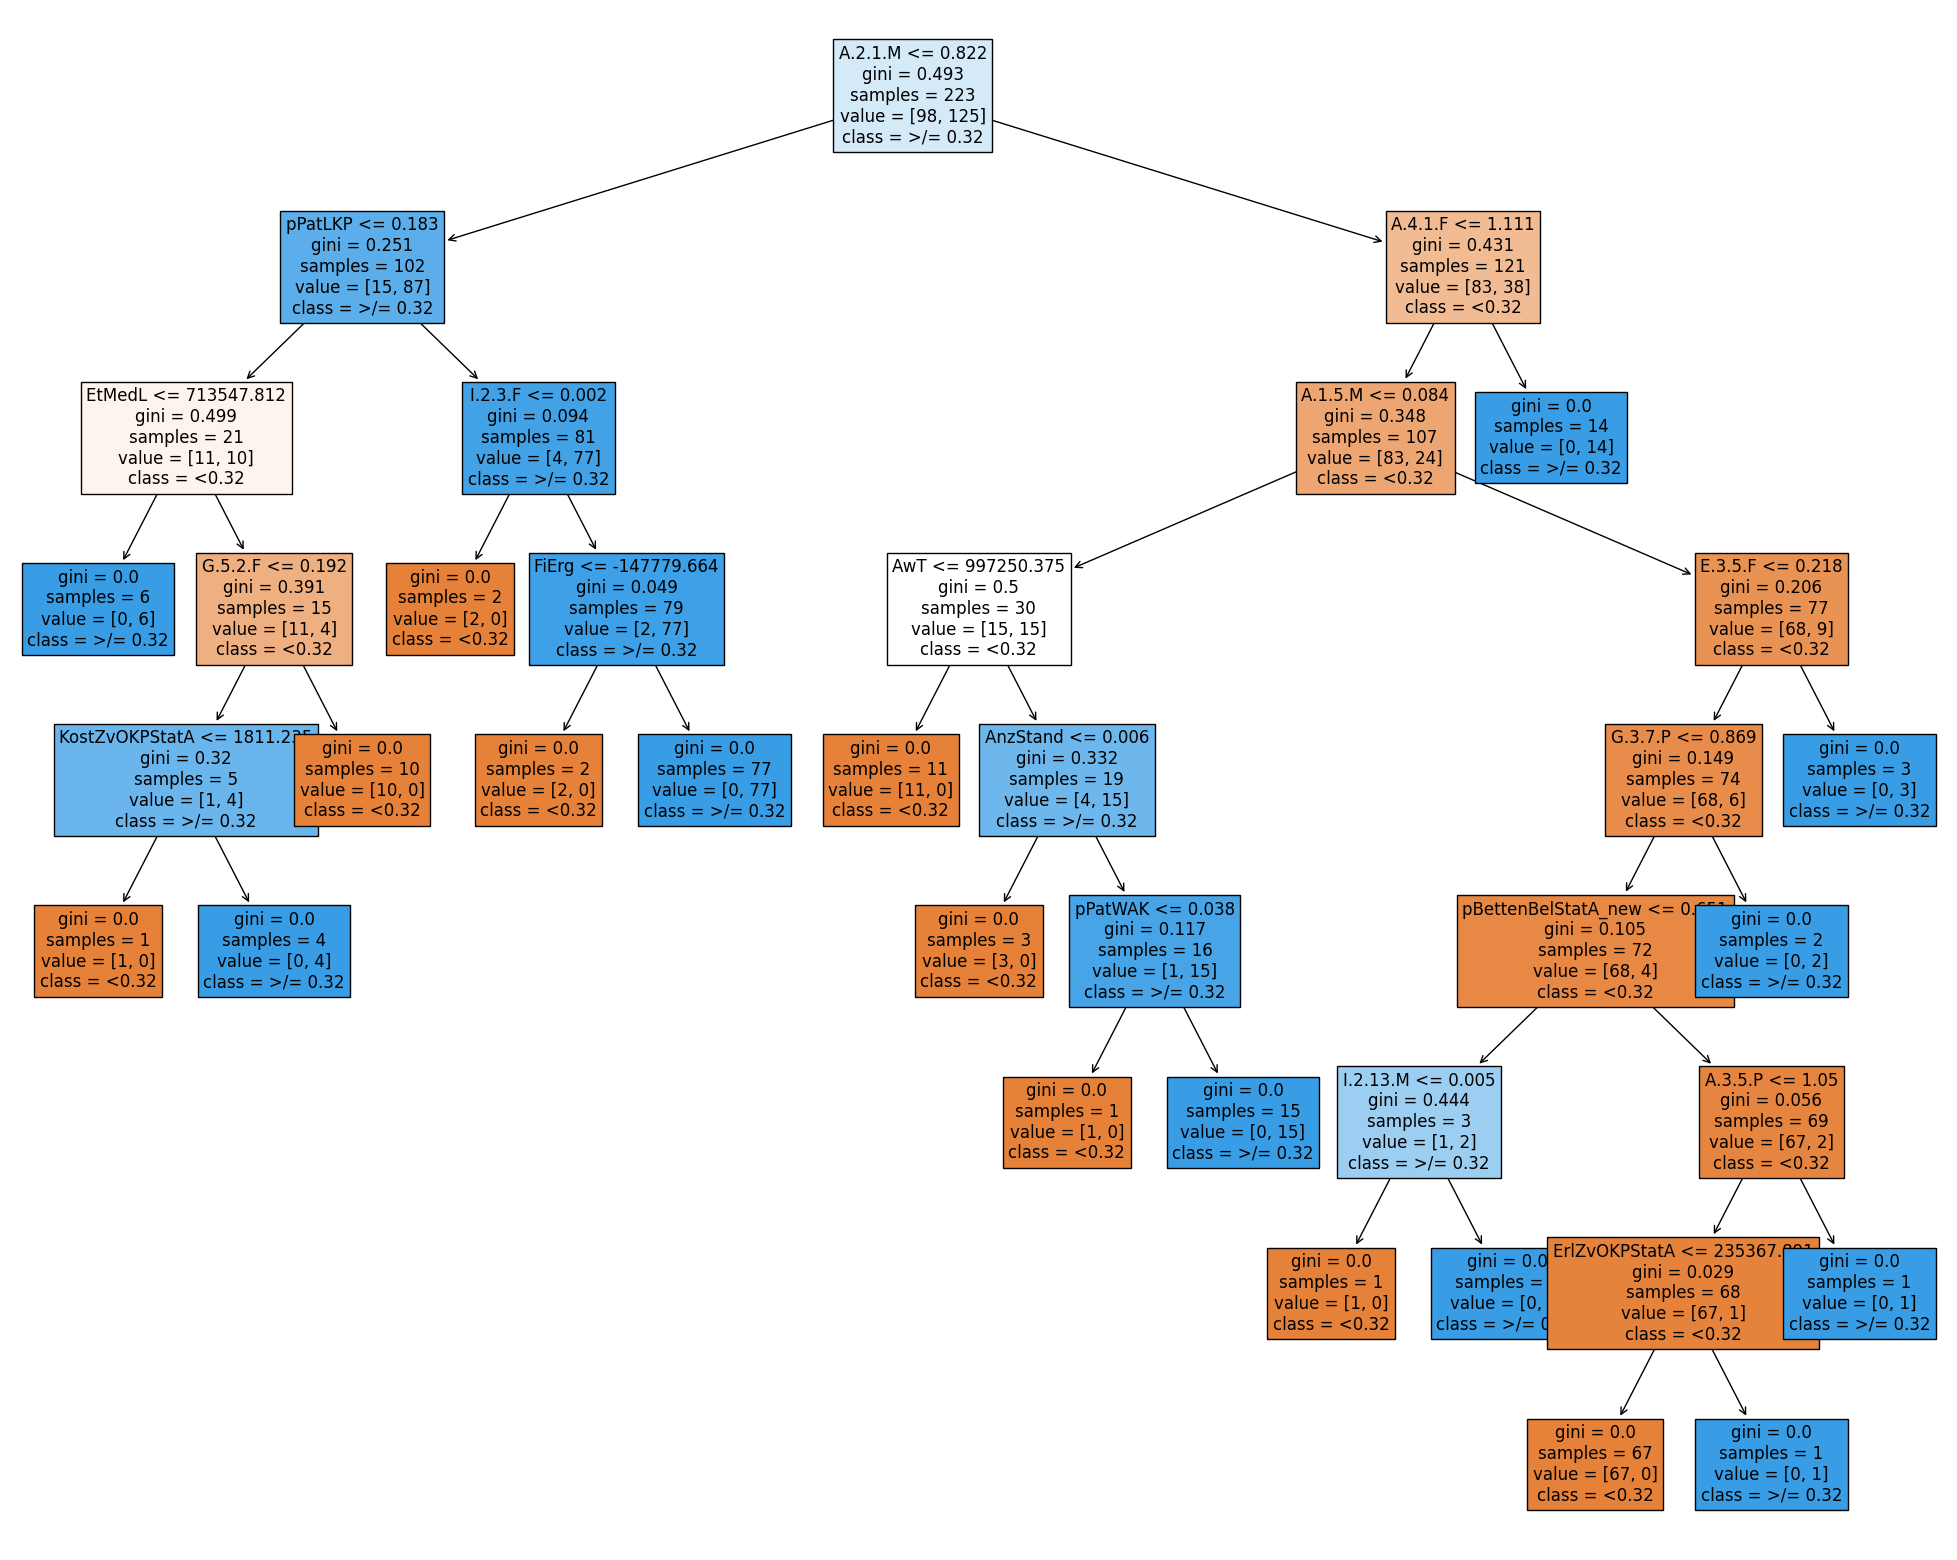

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=feature_names,
                   class_names={0:'<0.32', 1:'>/= 0.32'},
                   filled=True,
                  fontsize=12)


## 2. Using Entropy as Criterion

In [ ]:
clf_entropy = tree.DecisionTreeClassifier(max_depth = 10, criterion = 'entropy') #initiating a decision tree classifier

In [ ]:
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [ ]:
print("training score :", clf_entropy.score(X, y))

training score : 0.9362416107382551


In [ ]:
predictions = clf_entropy.predict(X_test)
print(predictions)

[1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1
 0]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7466666666666667

In [ ]:
clf_entropy.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02969219, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.04785425, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01470799, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
feature_importance_entropy = pd.DataFrame(clf.feature_importances_, index = feature_names).sort_values(0, ascending=False)

In [ ]:
features_entropy = list(feature_importance_entropy[feature_importance_entropy[0]>0].index)

Text(0.5, 1.0, 'Top 17 Features with Highest Decision Tree (Entropy) Feature Importance')

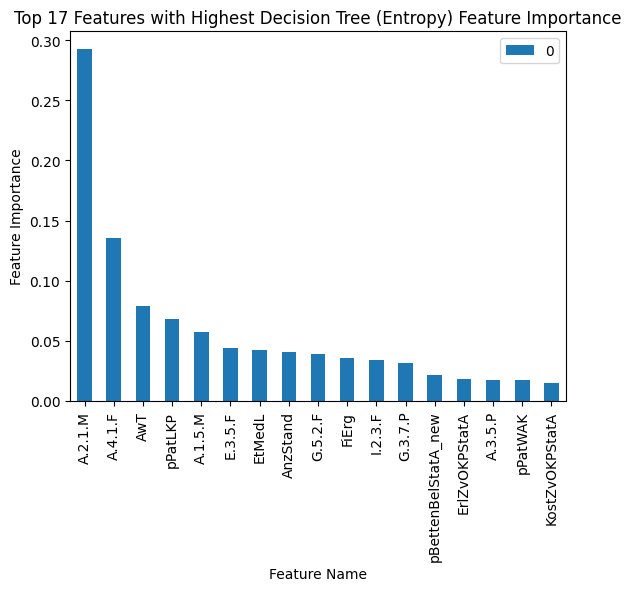

In [ ]:
feature_importance_entropy.head(17).plot(kind='bar')
plt.ylabel('Feature Importance')
plt.xlabel('Feature')
plt.title('Top 17 Features with Highest Decision Tree (Entropy) Feature Importance')

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
'''for n_est in (2, 5, 10, 50):
    rfc = RandomForestClassifier(n_estimators=n_est,)
    rfc.fit(X_train, y_train)
    print("training score : %.3f (n_est=%d)" % (rfc.score(X_train, y_train), n_est))'''

'for n_est in (2, 5, 10, 50):\n    rfc = RandomForestClassifier(n_estimators=n_est,)\n    rfc.fit(X_train, y_train)\n    print("training score : %.3f (n_est=%d)" % (rfc.score(X_train, y_train), n_est))'

In [ ]:
'''for depth in (2, 4, 6, 8, 10, 12):
    rfc = RandomForestClassifier(n_estimators=130, max_depth=depth,)
    rfc.fit(X_train, y_train)

    # print the training scores
    print("Training score: %.3f (depth=%d)" % (rfc.score(X_train, y_train), depth))'''


'for depth in (2, 4, 6, 8, 10, 12):\n    rfc = RandomForestClassifier(n_estimators=130, max_depth=depth,)\n    rfc.fit(X_train, y_train)\n\n    # print the training scores\n    print("Training score: %.3f (depth=%d)" % (rfc.score(X_train, y_train), depth))'

In [ ]:
rfc = RandomForestClassifier(n_estimators=5, max_depth=6)

In [ ]:
rfc.fit(X_train, y_train)

<ipython-input-205-823e2bba21ee>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


RandomForestClassifier(max_depth=6, n_estimators=5)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Change 'average' parameter as needed
recall = recall_score(y_test, y_pred, average='weighted')  # Change 'average' parameter as needed
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.7067
Precision: 0.7172
Recall: 0.7067


Text(0.5, 1.0, 'Top 17 Features with Highest Random Forest Feature Importance')

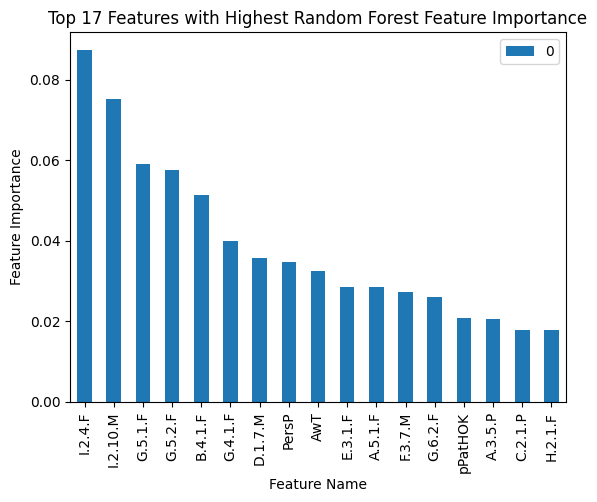

In [ ]:
rfc.feature_importances_
feature_importance_rfc= pd.DataFrame(rfc.feature_importances_, index = feature_names).sort_values(0, ascending=False)
features_rfc = list(feature_importance_rfc[feature_importance_rfc[0]>0].index)
feature_importance_rfc.head(17).plot(kind='bar')
plt.ylabel('Feature Importance')
plt.xlabel('Feature')
plt.title('Top 17 Features with Highest Random Forest Feature Importance')

Why do we get different features importances between the decision trees and the random forest?

- The random forest might reduce overfitting and focus more on features that are consistently important across different trees???

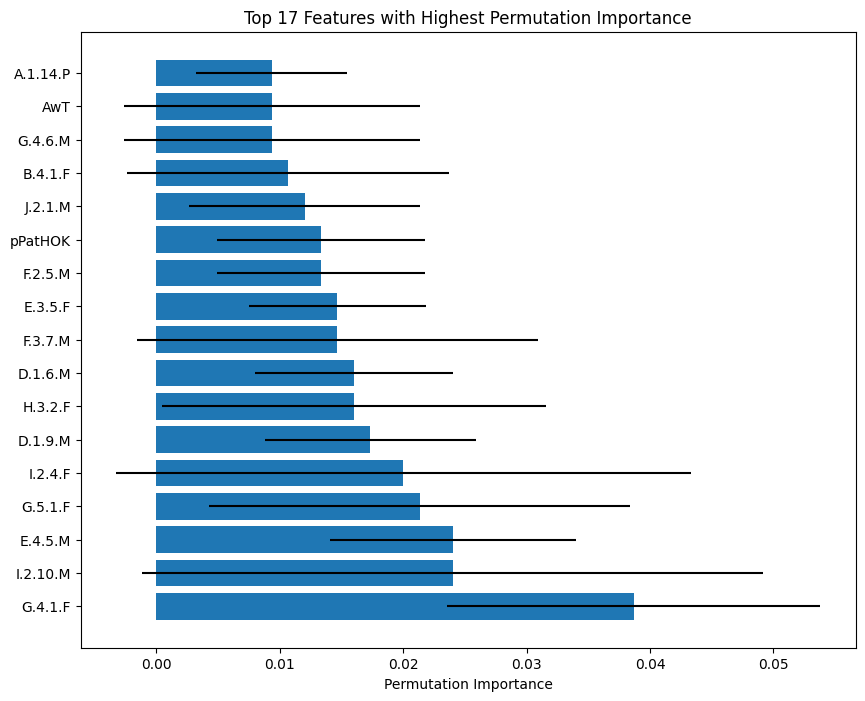

In [ ]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
result = permutation_importance(rfc, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Get sorted indices of mean importance
sorted_idx = result.importances_mean.argsort()[::-1]  # Sorting in descending order

# Get top 17 features with the highest permutation importance
top_features = sorted_idx[:17]

# Get feature names (assuming X_test is a DataFrame)
feature_names = X_test.columns

# Plot top features and their permutation importance
plt.figure(figsize=(10, 8))
plt.barh(range(len(top_features)), result.importances_mean[top_features], xerr=result.importances_std[top_features], align='center')
plt.yticks(range(len(top_features)), np.array(feature_names)[top_features])
plt.xlabel('Permutation Importance')
plt.title('Top 17 Features with Highest Permutation Importance')
plt.show()

# Boosted Decision Tree

In [ ]:
import xgboost as xgb

# Create an XGBoost classifier for binary classification
xgb_classifier = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification
    max_depth=3,                  # Maximum depth of each tree
    learning_rate=0.1,            # Learning rate
    n_estimators=100              # Number of trees (boosting rounds)
)

# Train the XGBoost classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7600


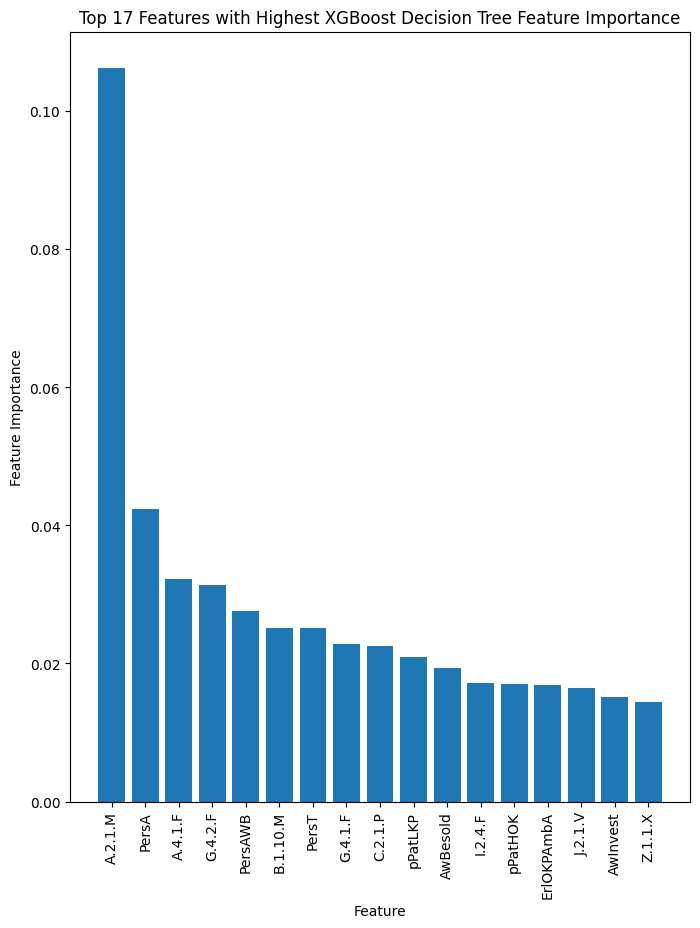

In [ ]:
feature_importance = xgb_classifier.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]  # Sorting in descending order

# Get top 17 features with the highest feature importance
top_features = sorted_idx[:17]  # Change the number to the desired top features count

# Plot top features and their importances with transposed axes
plt.figure(figsize=(8, 10))  # Reverse figsize for transposed axes
plt.bar(range(len(top_features)), feature_importance[top_features], align='center')  # Use bar instead of barh
plt.xticks(range(len(top_features)), np.array(feature_names)[top_features], rotation='vertical')  # Transpose x-axis and y-axis
plt.ylabel('Feature Importance')  # Label y-axis after transposing
plt.xlabel('Feature')
plt.title('Top 17 Features with Highest XGBoost Decision Tree Feature Importance')
plt.show()